In [1]:
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4350 sha256=40b7907245a6cfdcbbf2b1185418762b63e4d6925e173c0c502b1f7f06cf7325
  Stored in directory: /root/.cache/pip/wheels/83/0e/c9/4713ec9c1692e688f84fd3e80201018a02992949ca63697ba8
Successfully built selectivesearch


https://github.com/AlpacaDB/selectivesearch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pwd


'/content'

In [4]:
cd drive/MyDrive/dataset/

/content/drive/MyDrive/dataset


In [5]:

import selectivesearch
import cv2
import matplotlib.pyplot as plt

img shape: (450, 375, 3)


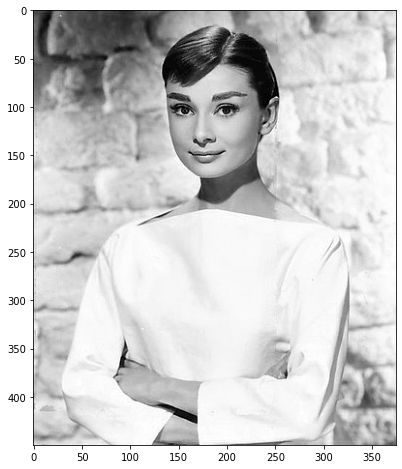

In [6]:
img = cv2.imread('audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # rgb로 convert 
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [7]:
#selectivesearch.selective_search(): image data에 대한 Region Proposal 정보를 return 
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000) 
#scale100= img 크기 정해줌, min_size=2000 최소 사이즈는 2000개로 함 

print(type(regions), len(regions))  # 41개의 regions  

<class 'list'> 41


In [8]:
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)   #41개 region으로 구성된 리스트 출력 

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


draw bounding box

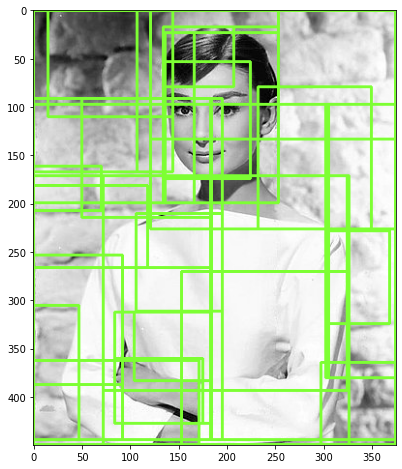

In [9]:
# rectangle():  left top, right bottom , color, thickness
 

#bounding box의 크기 조건 추가 (큰 후보만 추출)
#cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy() #원본 보전 위해 copy 본 사용
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    # rect[2] = width , rect[3] = height 
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

IOU

In [10]:
import numpy as np 

def compute_iou(cand_box, gt_box):

    # Calculate intersection areas
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    
    iou = intersection / union
    return iou

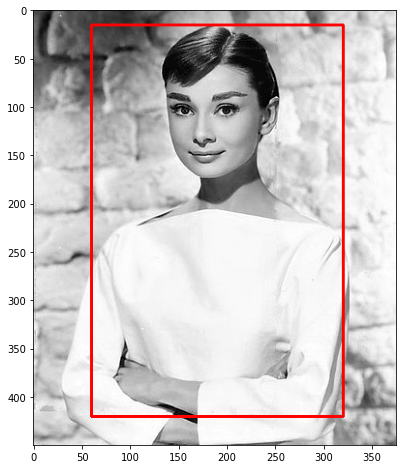

In [11]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Ground Truth (주어진 참값)
gt_box = [60, 15, 320, 420]

img = cv2.imread('audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0 , 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [12]:
import selectivesearch

_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 53


In [13]:
# seletive search 결과 53개 후보 
cand_rects = [cand['rect'] for cand in regions]
for index, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    print('index:', index, "iou:", iou)  

#index 3이 높은 iou 갖는 것을 확인 

index: 0 iou: 0.0
index: 1 iou: 0.0713319505816575
index: 2 iou: 0.1134453781512605
index: 3 iou: 0.9874899187876287
index: 4 iou: 0.9748907882241216
index: 5 iou: 0.09851851851851852
index: 6 iou: 0.04228869895536562
index: 7 iou: 0.15042735042735042
index: 8 iou: 0.14541310541310543
index: 9 iou: 0.10112060778727446
index: 10 iou: 0.1194681861348528
index: 11 iou: 0.14017094017094017
index: 12 iou: 0.0
index: 13 iou: 0.0
index: 14 iou: 0.5933903133903133
index: 15 iou: 0.0
index: 16 iou: 0.0853656220322887
index: 17 iou: 0.12535612535612536
index: 18 iou: 0.0
index: 19 iou: 0.1498762283399595
index: 20 iou: 0.0
index: 21 iou: 0.05242165242165242
index: 22 iou: 0.0
index: 23 iou: 0.050123456790123457
index: 24 iou: 0.07313390313390314
index: 25 iou: 0.009348810110697799
index: 26 iou: 0.0
index: 27 iou: 0.23817663817663817
index: 28 iou: 0.18719489628676664
index: 29 iou: 0.19555555555555557
index: 30 iou: 0.20454890788224123
index: 31 iou: 0.0
index: 32 iou: 0.5958024691358025
index:

In [14]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects

[(0, 0, 58, 257),
 (0, 0, 58, 266),
 (0, 0, 58, 266),
 (0, 0, 171, 449),
 (0, 0, 195, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 256, 57, 188),
 (0, 256, 171, 193),
 (16, 0, 270, 50),
 (16, 0, 270, 109),
 (16, 0, 270, 199),
 (16, 0, 302, 418),
 (62, 17, 256, 401),
 (63, 0, 311, 449),
 (63, 18, 114, 91),
 (63, 91, 120, 123),
 (63, 91, 132, 220),
 (63, 171, 254, 246),
 (63, 171, 254, 247),
 (63, 171, 254, 247),
 (63, 171, 311, 278),
 (84, 313, 290, 136),
 (84, 360, 290, 89),
 (84, 360, 290, 89),
 (134, 18, 119, 181),
 (136, 23, 117, 176),
 (153, 366, 151, 51),
 (166, 23, 87, 176),
 (197, 0, 177, 420),
 (197, 18, 120, 132),
 (197, 18, 120, 209),
 (232, 79, 85, 148),
 (284, 0, 90, 420),
 (284, 0, 90, 420),
 (284, 0, 90, 420),
 (323, 105, 51, 248)]

index: 5 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 6 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 7 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 13 iou: 0.815085997397344 rectangle: (16, 0, 318, 418)
index: 14 iou: 0.9748907882241216 rectangle: (62, 17, 318, 418)
index: 15 iou: 0.7389566501483806 rectangle: (63, 0, 374, 449)
index: 19 iou: 0.5933903133903133 rectangle: (63, 171, 317, 417)
index: 20 iou: 0.5958024691358025 rectangle: (63, 171, 317, 418)
index: 21 iou: 0.5958024691358025 rectangle: (63, 171, 317, 418)
index: 22 iou: 0.5008648690956052 rectangle: (63, 171, 374, 449)


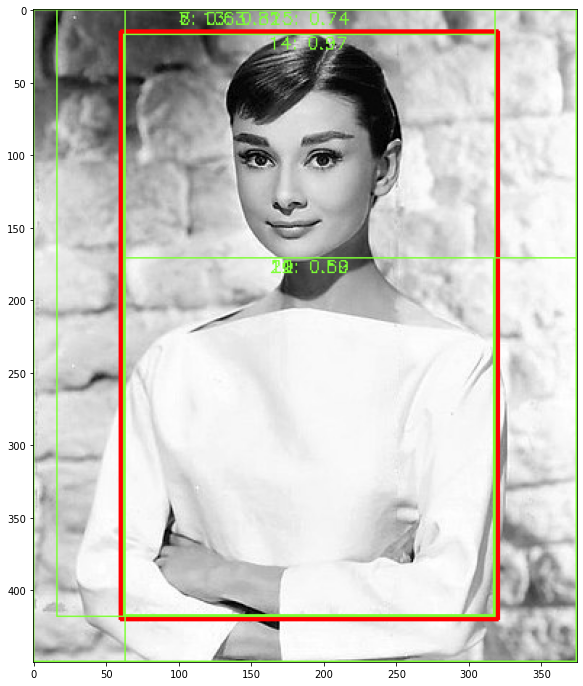

In [15]:

# img = cv2.imread('audrey01.jpg')
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print('img shape:', img.shape)

# green_rgb = (125, 255, 51)
# cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]
# gt_box = [60, 15, 320, 420]
# img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

for index, cand_box in enumerate(cand_rects):
    
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    
    if iou > 0.5:
        print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]) )
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)
    
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()